In [10]:
# Numerical solution of the linear advection equation
# u_t + u_x = 0
# using *centered difference* for u_x -> NAIVE
# periodic boundary data

In [11]:
from numpy import *
import matplotlib.pyplot as plt

In [12]:
# Initial condition
def u0(x):
   return where(abs(x)<=1, 1.0, 0.0)
   #return where(x<=0, -1,0)

In [13]:
# Spatial domain [-L, L] and time [0, T]   
L = 5.
T = 1.
# Discretization parameters h, dt
h = 0.1
dt = 0.025
# Grid ratio 
gam = dt/h
# number of space and time steps
n = int(2*L/h)+1
m = int(T/dt)

In [14]:
# Initialize
x = linspace(-L,L,n)
u = u0(x)

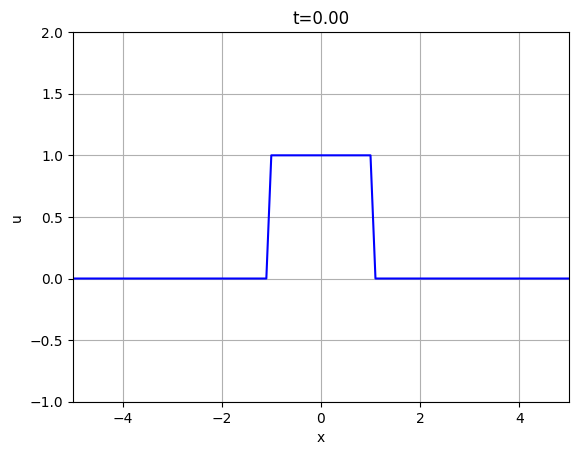

In [15]:
# Plot initial data
fig,ax= plt.subplots()
ax.set(xlim=(-L,L), ylim=(-1,2), xlabel='x', ylabel='u', title='t=0.00')
ax.plot(x, u0(x), 'b-')
ax.grid()
plt.show()

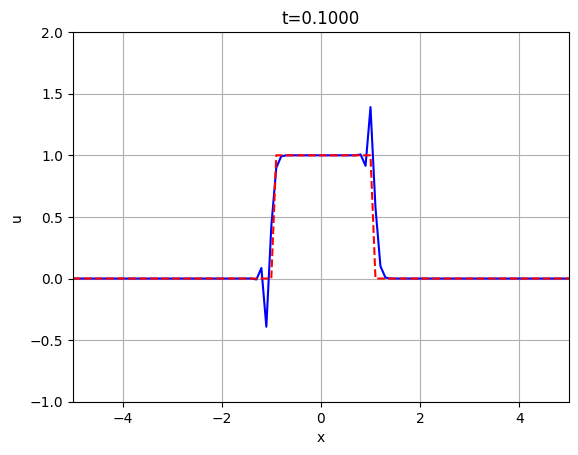

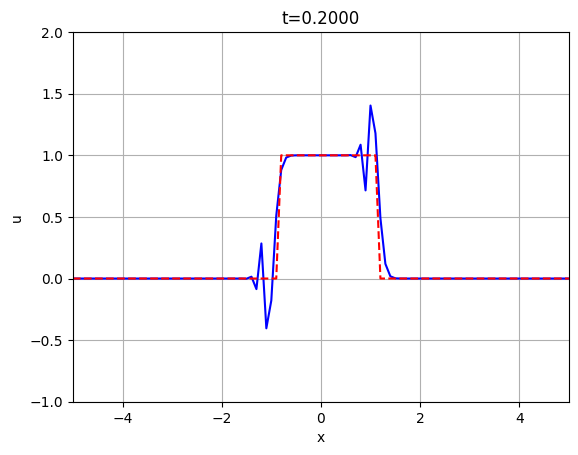

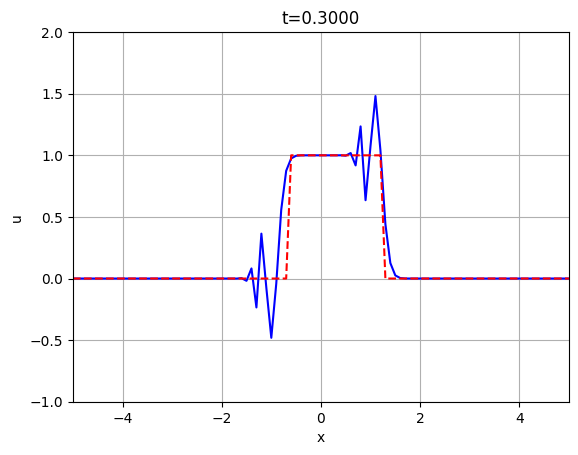

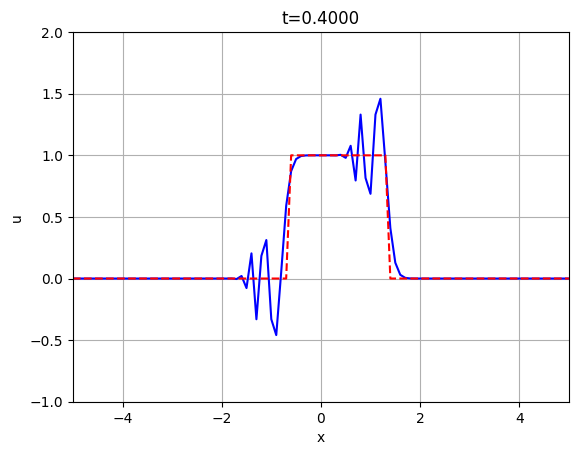

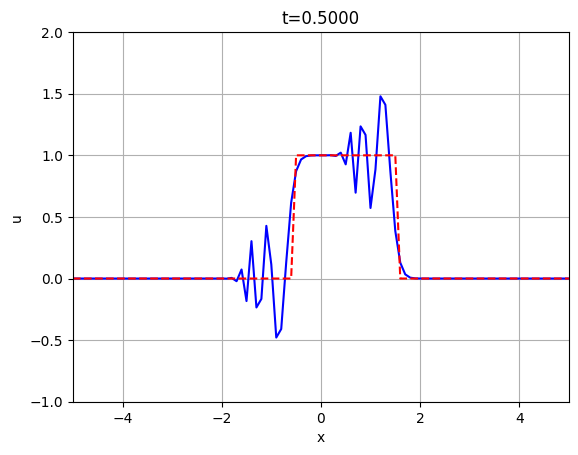

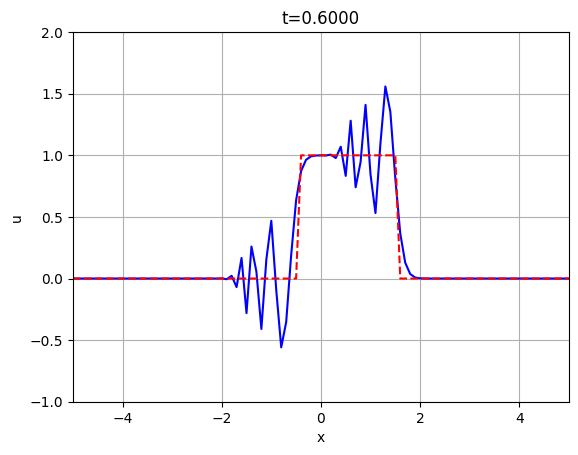

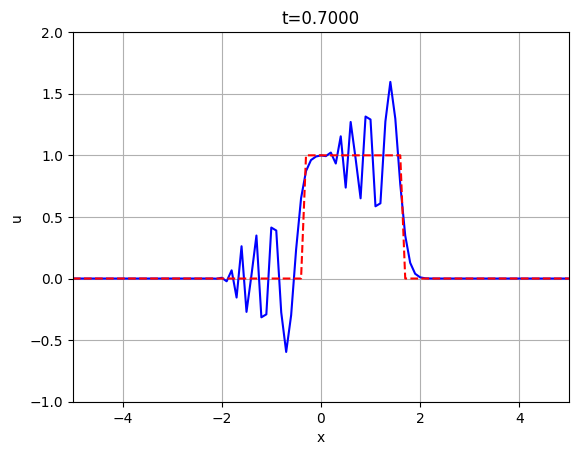

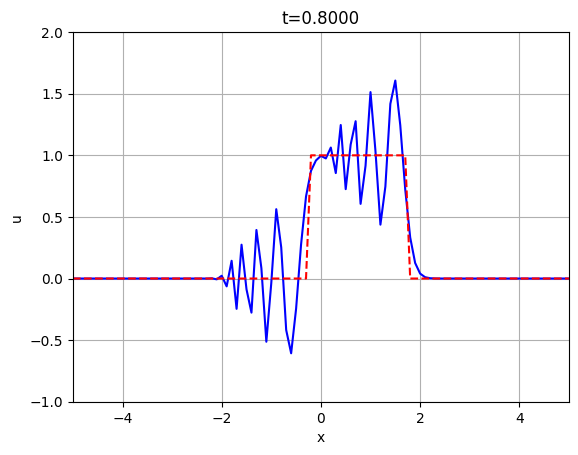

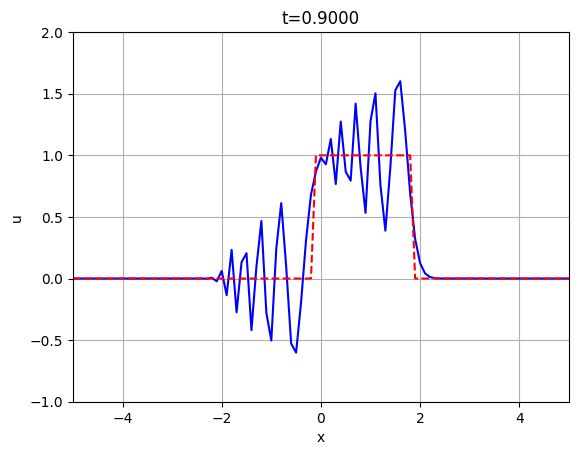

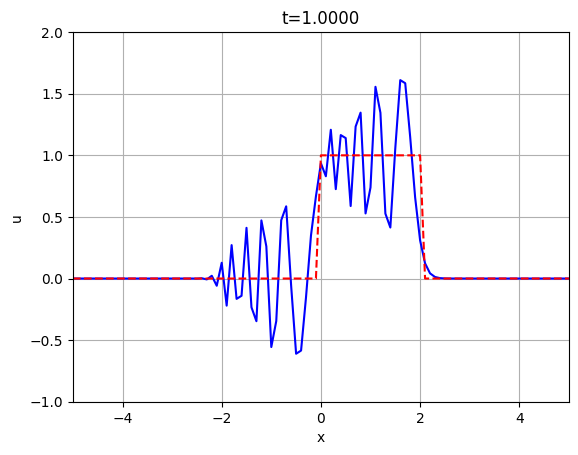

In [16]:
# Time loop
for t in linspace(dt,T,m):
    # Compute solution at new time level
    u[1:-1] = u[1:-1]-gam*(u[2:]-u[0:-2])/2.
    # boundary data - periodic boundary conditions
    u[0] = u[0]-gam*(u[1]-u[-1])/2.
    u[-1] = u[-1]-gam*(u[0]-u[-2])/2.
    
    # and plot it, if t is multiple of 0.1
    if isclose(10*t,around(10*t)):
        fig,ax= plt.subplots()
        ax.set(xlim=(-L,L), ylim=(-1,2), xlabel='x', ylabel='u',
              title='t=%6.4f' %t)
        ax.plot(x, u, 'b-')
        ax.plot(x, u0(x-t), 'r--')
        ax.grid()